

Mariya Mushtaq

*Final Project for BIOL B250 (Fall 2023)*

*Dr. Alison Weber*

# <center>**Lung Cancer Prediction Model**</center>

## Imports

In [ ]:
# libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


# plots
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

##Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Load Dataset

In [ ]:
# loading data from drive
homeFolder = '/content/drive/MyDrive/BrynMawrCollege/year2/ComputationalScience/FinalProject/Submission/'
filename = 'cancerpatientData'  # sets base file name to cancerpatient
#file path
file_path = homeFolder + filename + '.csv'
# read csv file
data = pd.read_csv(file_path)

##  Dataset

In [ ]:
data

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


## Data Encoding and Splitting


In [ ]:
# y --> target variable
y = data['Level'].replace({'Low': 0, 'Medium': 1, 'High': 2})
# X --> feature matrix
X = data.drop('index', axis = 1) # removing index feature
X = X.drop('Patient Id', axis = 1) # removing patient id feature
X = X.drop('Level', axis = 1)  # removing level feature

In [ ]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Data Exploration and Plots

### Data Processing

In [ ]:
# dataset dimensions
data.shape
num_rows, num_columns = data.shape
print("Summary:")
print(data.shape)
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Summary:
(1000, 27)
Number of rows: 1000
Number of columns: 27


In [ ]:
# trimming
plot_data = data.drop('index', axis = 1)
plot_data = plot_data.drop('Patient Id', axis = 1)
# encoding
label_encoder = LabelEncoder()
level_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
plot_data['Level_encoded'] = plot_data['Level'].map(level_mapping)
plot_data = plot_data.drop('Level', axis = 1)
plot_data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Cluster,Level_encoded
0,33,1,2,4,5,4,3,2,2,4,...,4,2,2,3,1,2,3,4,1,0
1,17,1,3,1,5,3,4,2,2,2,...,3,7,8,6,2,1,7,2,0,1
2,35,1,4,5,6,5,5,4,6,7,...,7,9,2,1,4,6,7,2,1,2
3,37,1,7,7,7,7,6,7,7,7,...,2,3,1,4,5,6,7,5,2,2
4,46,1,6,8,7,7,7,6,7,7,...,2,4,1,4,2,4,2,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,3,2,7,8,2,4,5,3,2,2
996,37,2,6,8,7,7,7,6,7,7,...,6,5,7,2,4,3,1,4,2,2
997,25,2,4,5,6,5,5,4,6,7,...,7,9,2,1,4,6,7,2,1,2
998,18,2,6,8,7,7,7,6,7,7,...,2,4,1,4,2,4,2,3,2,2


### Plot 1: Genetic Risk vs Level

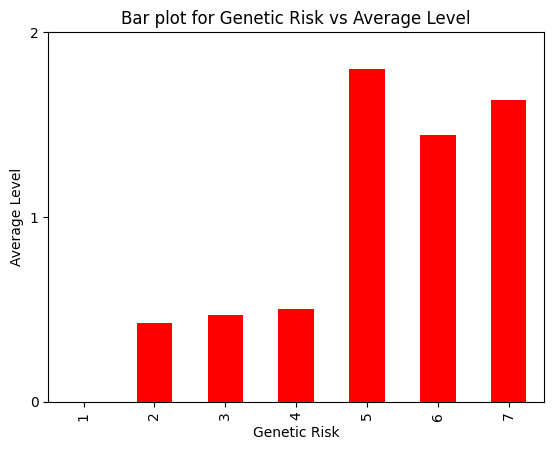

In [ ]:
# Bar plot for 'Genetic Risk' vs 'Level'
genetic_risk_level_mean = plot_data.groupby('Genetic Risk')['Level_encoded'].mean()
genetic_risk_level_mean.plot(kind='bar', color='red')
plt.xlabel('Genetic Risk')
plt.ylabel('Average Level')
plt.yticks(range(0,3))
plt.title('Bar plot for Genetic Risk vs Average Level')
plt.show()

### Plot 2: Occupational Hazards vs Level

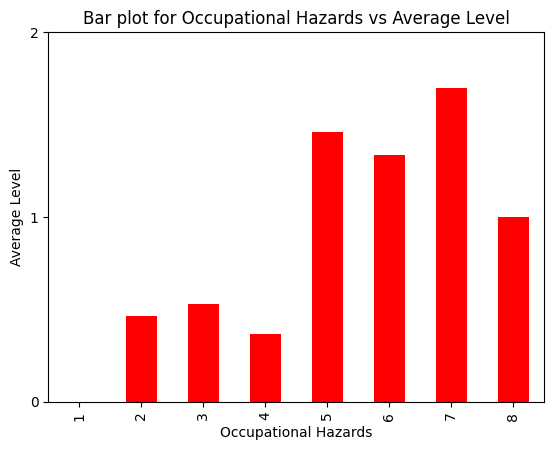

In [ ]:
# Bar plot for 'Occupational Hazards' vs average 'Level'
occupational_hazards_level_mean = plot_data.groupby('OccuPational Hazards')['Level_encoded'].mean()
occupational_hazards_level_mean.plot(kind='bar', color='red')
plt.xlabel('Occupational Hazards')
plt.ylabel('Average Level')
plt.yticks(range(0,3))
plt.title('Bar plot for Occupational Hazards vs Average Level')
plt.show()


## <center> **Important Note** </center>

##### The predictions and accuracy levels would have slight variations if you re-run it due to randomness introduced delibrately. For the report findings to match the outcomes here, please do not re-run the code. The code I have attached has already been run before submission and the output is available. However, if you want to analyze the variations due to randomness, feel free to re-run the code sections.


## Logistic Regression Model





In [ ]:
# Logistic Regression Model
model = LogisticRegression(C = 0.1, max_iter=100000, solver = 'liblinear', multi_class='ovr', random_state= 75)
# training
model.fit(X_train, y_train)
# predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluations
acc = accuracy_score(y_test, y_pred)
print('Model Accuracy:', acc)

Model Accuracy: 0.9433333333333334


## Analysis of Logistic Regression Model




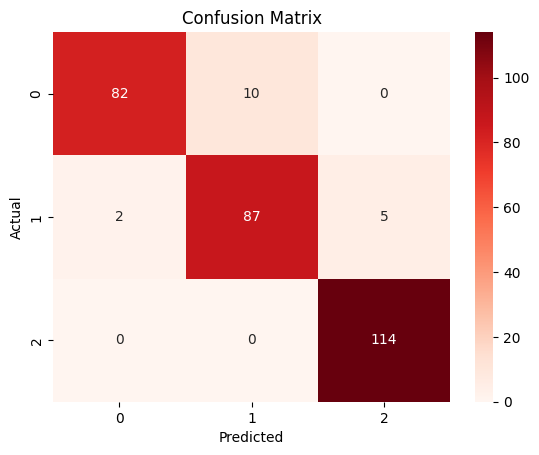

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## K-nearest Neighbors Model

In [ ]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors = 30, p = 2, metric = 'minkowski', weights = 'uniform')
# training
knn.fit(X_train, y_train)
# predictions
y_pred = knn.predict(X_test)

In [ ]:
# Evaluations
acc = accuracy_score(y_test, y_pred)
print('Model Accuracy:', acc)


Model Accuracy: 0.9333333333333333


## Analysis of K-nearest Neighbors Model


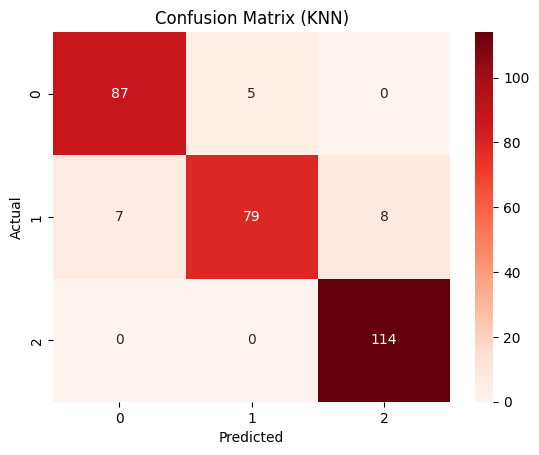

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## PCA

In [ ]:
# standardizing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# PCA
pca = PCA(n_components= 5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

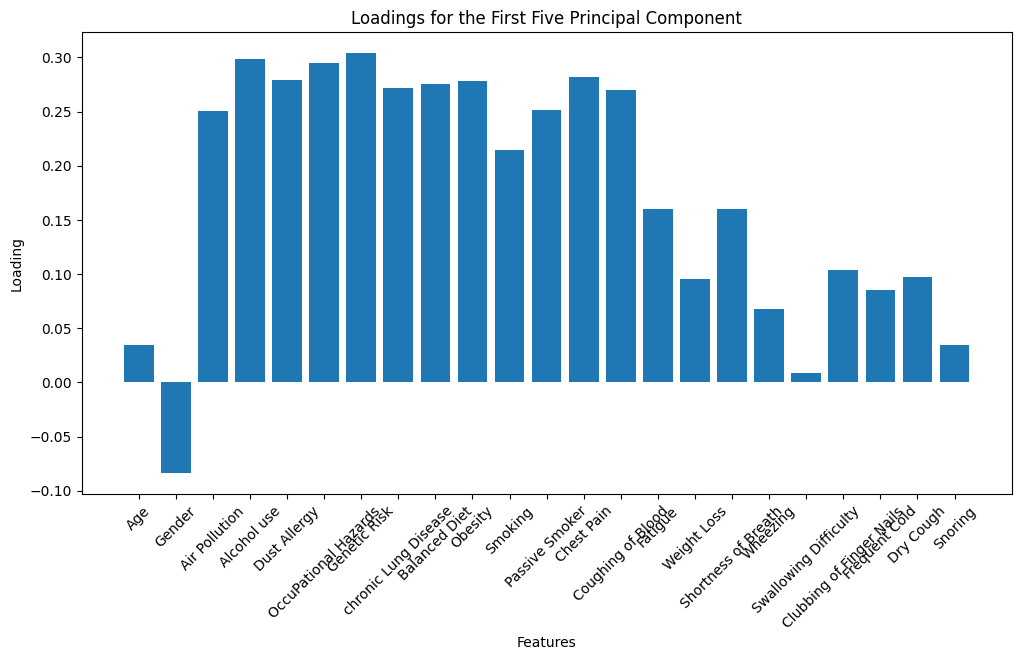

In [ ]:
# loadings
loadings = pca.components_

# Creating a DataFrame to associate loadings with feature names
loadings_df = pd.DataFrame(loadings, columns=X.columns)

# Plotting the loadings for the first five principal component
plt.figure(figsize=(12, 6))
plt.bar(X.columns, loadings_df.iloc[0, :])
plt.title('Loadings for the First Five Principal Component')
plt.xlabel('Features')
plt.ylabel('Loading')
plt.xticks(rotation=45)
plt.show()

##Logistic Regression on PCA transformed data

In [ ]:
# Logistic Regression on PCA-transformed data
model = LogisticRegression(C = 0.1, max_iter=100000, solver = 'liblinear', multi_class='ovr', random_state= 75)
# Training
model.fit(X_train_pca, y_train)
# Predictions
y_pred = model.predict(X_test_pca)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.93


## Analysis of PCA transformed Logistic Regression Model

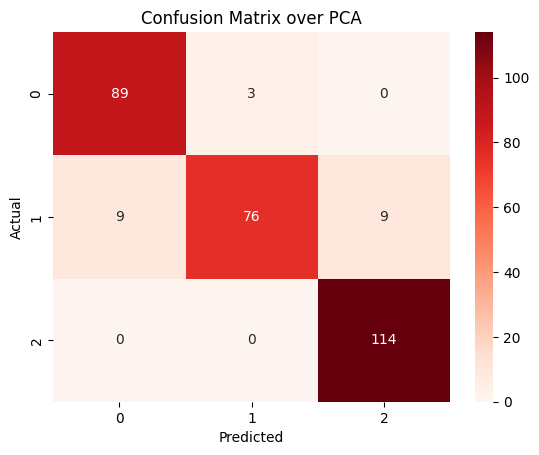

In [ ]:
# Confusion Matrix
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix over PCA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## KNN on PCA transformed data

In [ ]:
# KNN Model on PCA-transformed data
knn_model = KNeighborsClassifier(n_neighbors = 30, p = 2, metric = 'minkowski', weights = 'uniform')
# Training
knn_model.fit(X_train_pca, y_train)
# Predictions
y_pred = knn_model.predict(X_test_pca)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9733333333333334


## Analysis of PCA transformed KNN Model

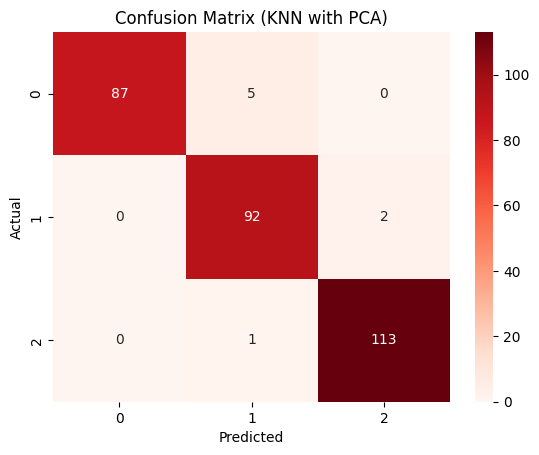

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (KNN with PCA)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# <center>**High Risk Group Prediction using K Means Clustering**</center>


## Imports

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## K Means Clustering

In [ ]:
X

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3
996,37,2,6,8,7,7,7,6,7,7,...,7,9,6,5,7,2,4,3,1,4
997,25,2,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
998,18,2,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [ ]:
# feature selection
top_features = ['Alcohol use', 'Genetic Risk', 'OccuPational Hazards','Obesity','Chest Pain','Dust Allergy']
X_subset = X[top_features]

In [ ]:
X_subset

,Alcohol use,Genetic Risk,OccuPational Hazards,Obesity,Chest Pain,Dust Allergy
0,4,3,4,4,2,5
1,1,4,3,2,2,5
2,5,5,5,7,4,6
3,7,6,7,7,7,7
4,8,7,7,7,7,7
...,...,...,...,...,...,...
995,7,7,7,7,7,7
996,8,7,7,7,7,7
997,5,5,5,7,4,6
998,8,7,7,7,7,7


In [ ]:
# standardizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)

In [ ]:
# K Means Algorithm
km = KMeans(n_clusters= 3, init='random', n_init='auto', max_iter=300, random_state= 0)
y_km = km.fit_predict(X_scaled)

In [ ]:
# Analysis of High-Risk Cluster
data['Cluster'] = y_km
cluster_analysis = data.groupby('Cluster')['Level'].value_counts().unstack().fillna(0)
print(cluster_analysis)

Level     High    Low  Medium
Cluster                      
0          0.0  252.0   162.0
1         90.0   31.0    70.0
2        275.0   20.0   100.0


In [ ]:
# Visualizations
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

principal_components = pca.components_
print("Principal Components:")
print(principal_components)

Principal Components:
[[-0.41835349 -0.43122814 -0.43022937 -0.3752045  -0.38900153 -0.40227446]
 [ 0.37202262 -0.03213751  0.17884526 -0.50115484 -0.58295218  0.48743337]]


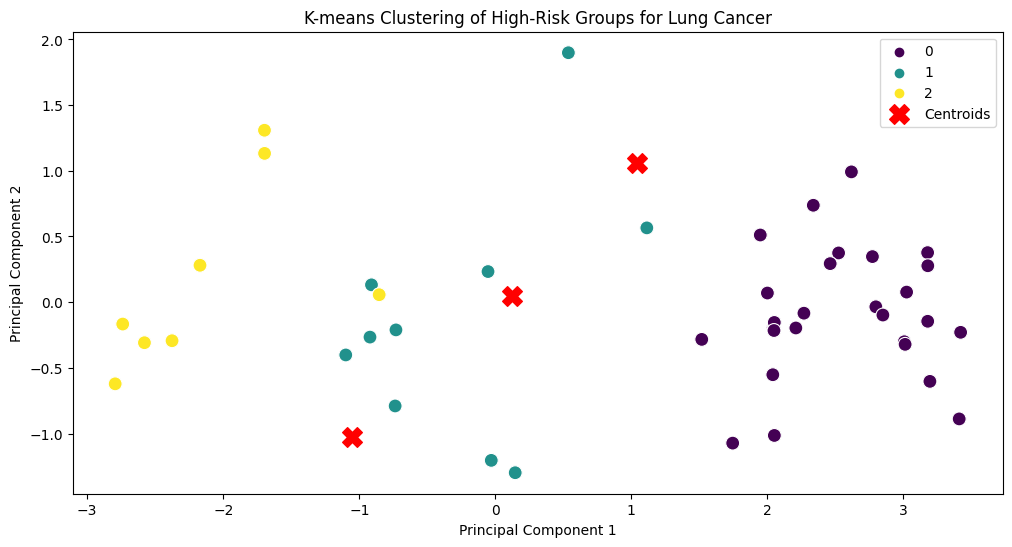

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_km, palette='viridis', s=100)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, marker='X', c='red', label='Centroids')
plt.title('K-means Clustering of High-Risk Groups for Lung Cancer')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()